## Identification.

• Giovana Vieira de Morais - 11921908

• Lucas Batista Gabriel - 7656147



## Name of the dataset
Dataset: City Cellular Traffic Map
URL: https://github.com/caesar0301/city-cellular-traffic-map

## Abstract

The dataset describes in two files (traffic and topology) the hourly traffic per Base Station in some city in China with 1625680 and 13296 records each.

The first File (Traffic) has the number of packets trafficked and the corresponded number of users connected per hour per base station.

In the second file (topology) it is described for each Base Station what is the Latitude and Longitude.

* Traffic trace file (1625680 rows, 5 columns)

> * BS: identity of each cellular base station in this public data.
> * Time_hour: hourly timestamp in UNIX epoch time (time zone GMT+8).
> * Users: the number of active users associated with specific base station and hour.
> * Packets: the number of transferd packets associated with specific base station and hour.
> * Bytes: the number of transferd bytes associated with specific base station and hour.

* Topology file (13296 rows, 3 columns)

> * BS: identity of each cellular base station in this public data.
> * Lon: relative longitude of given base station.
> * Lat: relative latitude of given base station.

## Questions to the dataset

Question 1: How is the topology of the Base Stations?

Question 2: What is the hour in the day with most active users?

Question 3: Which Base Station receives more/less traffic?

Question 4: Which Base Station receives the biggest/smallest packets?



## EDA

The strategy for this dataset will be, through graph visualisation, to group the data using some features of the dataset in order to answer each one of the four questions proposed above.

The main idea is to identify if the dataset has not just enought data but also if the data collected is good.

In [24]:
import random
import pandas as pd
from statistics import mean, median
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import folium
from folium.plugins import MarkerCluster
%matplotlib inline
rcParams['figure.figsize'] = (15, 10)

### Celular Traffic

In [2]:
cellular_traffic_data = pd.read_csv('../data/traceset/cellular_traffic.csv', delimiter = ',', decimal='.')

In [3]:
cellular_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625680 entries, 0 to 1625679
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   bs         1625680 non-null  int64  
 1   time_hour  1625680 non-null  int64  
 2   users      1625680 non-null  int64  
 3   packets    1625680 non-null  int64  
 4   bytes      1625680 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 62.0 MB


In [4]:
cellular_traffic_data.bs.max()

13269

In [5]:
cellular_traffic_data.tail()

bs   time_hour  users  packets        bytes
1625675  7993  1345993200    159    29125   41199852.0
1625676  7995  1345993200    168    24182   36864079.0
1625677  7997  1345993200    190    33781   78226635.0
1625678  7998  1345993200    198    34345  228122304.0
1625679  7999  1345993200    237    36725   67846985.0

In [6]:
cellular_traffic_data.describe()

bs     time_hour         users       packets         bytes
count  1.625680e+06  1.625680e+06  1.625680e+06  1.625680e+06  1.625680e+06
mean   5.372162e+03  1.345643e+09  1.377170e+01  1.724474e+03  8.223766e+06
std    3.060182e+03  1.952034e+05  2.034654e+01  4.600335e+03  1.902086e+08
min    1.000000e+00  1.345306e+09  1.000000e+00  0.000000e+00  0.000000e+00
25%    2.938000e+03  1.345475e+09  2.000000e+00  7.200000e+01  8.074000e+04
50%    5.276000e+03  1.345637e+09  6.000000e+00  4.430000e+02  5.738290e+05
75%    7.528000e+03  1.345806e+09  1.600000e+01  1.695000e+03  2.553905e+06
max    1.326900e+04  1.345993e+09  4.130000e+02  7.945850e+05  1.148665e+11

### Topology

In [8]:
topology_data = pd.read_csv('../data/traceset/topology.csv', delimiter = ',', decimal='.')

In [9]:
topology_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13269 entries, 0 to 13268
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bs      13269 non-null  int64  
 1   lon     13269 non-null  float64
 2   lat     13269 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 311.1 KB


In [10]:
topology_data.head()

bs         lon        lat
0   1  111.247626  13.161971
1   2  111.209676  13.288072
2   3  111.210788  13.295707
3   4  111.203125  13.290818
4   5  111.215505  13.281345

In [11]:
topology_data.tail()

bs         lon        lat
13264  13265  111.063918  13.198752
13265  13266  111.066573  13.039694
13266  13267  111.065121  13.107543
13267  13268  111.196631  13.205329
13268  13269  111.036413  13.168402

In [12]:
topology_data.describe()

bs           lon           lat
count  13269.000000  13269.000000  13269.000000
mean    6635.000000    111.083635     13.147439
std     3830.574696      0.063283      0.063965
min        1.000000    110.951698     13.004320
25%     3318.000000    111.043553     13.111423
50%     6635.000000    111.075527     13.148746
75%     9952.000000    111.111813     13.185112
max    13269.000000    111.248901     13.353194

# Question 1: How is the topology of the Base Stations?

## Map visualization

Since we have 13269 base stations in our map, visualization can get a little difficult.
To solve that and to make computation faster, we will show our data with clusters.
Each cluster is marked with the quantity of base stations inside. Click to zoom inside that cluster.

The "swept the real longitudes and latitudes before publishing the data because we were banned by the privacy protocol in the research". So we can't visualize our topology data clearly.

In [13]:
topology_data.count()

bs     13269
lon    13269
lat    13269
dtype: int64

In [14]:
BBox = ((topology_data.lon.min(),   topology_data.lon.max(),      
         topology_data.lat.min(), topology_data.lat.max()))
BBox

(110.951698, 111.248901, 13.004319500000001, 13.3531938)

In [15]:
# ruh_m = plt.imread('./map.png')
# fig, ax = plt.subplots(figsize = (8,7))
# ax.scatter(topology_data.lon, topology_data.lat, zorder=1, alpha= 0.2, c='b', s=10)
# ax.set_title('Topology of Base stations')
# ax.set_xlim(BBox[0],BBox[1])
# ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### Clustered base station

In [16]:
# click to open the markers and visualize the base stations
mc = MarkerCluster()

cluster_map = folium.Map(location = [topology_data['lat'].mean(), topology_data['lon'].mean()],
                 title = 'Clustered base station')

for i in range(0, len(topology_data)):
    mc.add_child(folium.Marker([topology_data.iloc[i]['lat'], topology_data.iloc[i]['lon']]))
    
cluster_map.add_child(mc)

cluster_map

# Question 2: What is the hour in the day with most active users?

In [18]:
cellular_traffic_data['time_hour'] = pd.to_datetime(cellular_traffic_data['time_hour'], unit='s', utc='Asia/Shanghai')
cellular_traffic_data['hour'] = cellular_traffic_data['time_hour'].dt.hour
cellular_traffic_data['day'] = cellular_traffic_data['time_hour'].dt.day

In [21]:
total_hour_traffic = cellular_traffic_data.groupby(['hour']).mean()

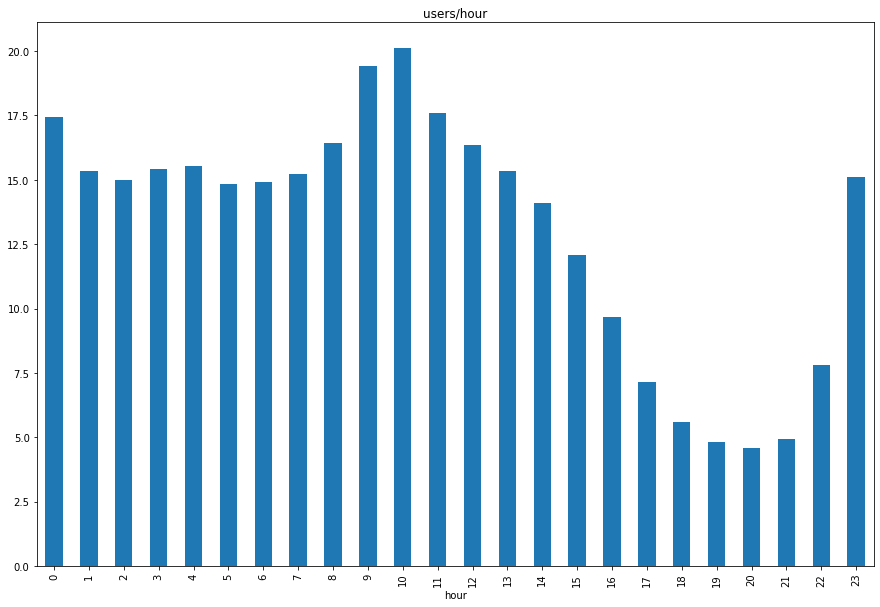

In [22]:
total_hour_traffic['users'].plot(kind='bar', title='users/hour')

We can see that 7PM has the highest mean, followed by 6PM. But it doesn't mean that the same hours have the 
the highest packets quantity as we can see below. 

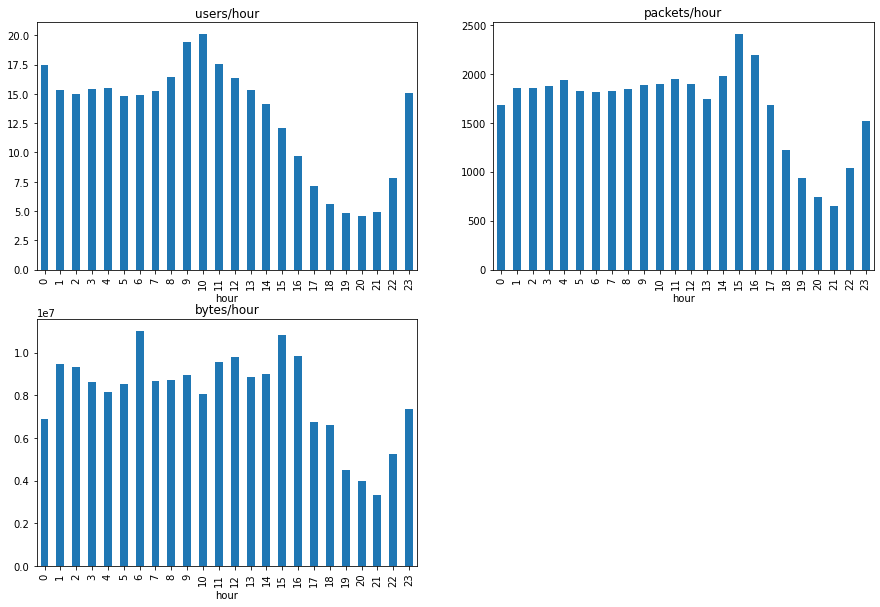

In [23]:
plt.subplot(2,2,1)
total_hour_traffic['users'].plot(kind='bar', title='users/hour')
plt.subplot(2,2,2)
total_hour_traffic['packets'].plot(kind='bar', title='packets/hour')
plt.subplot(2,2,3)
total_hour_traffic['bytes'].plot(kind='bar', title='bytes/hour')

So now we can see that the highest packet traffic occurs at 11PM and 12PM. The largest packets (the ones with more
bytes) are traveling at 2PM and 11PM.

# Base Station Analysis

## Question 3: Which Base Station receives more/less traffic?

## Question 4: Which Base Station receives the biggest/smallest packets?

### To answer this question, we have to consider some scenarios:

#### Looking for all days

- What's the Packet distribution per base station
- The maximum/minimum packet trafficked in each Base Station
- The largest/smallest number of bytes trafficked in each Base station

#### Looking each day

- What's the BS that has more users connected at the same time (per hour and per day)?
- What's the BS that has more packets (per hour and per day)?
- What's the BS that has the largest packets (per hour and per day)?



## All Days

### Packet distribution per base station

In [30]:
# plt.figure(figsize=(10,10))
# sns.boxplot(x='bs', y='packets', data= cellular_traffic_data)

In [31]:
# sns.barplot(x = cellular_traffic_data['bs'], y = cellular_traffic_data['packets'], estimator = mean)
# plt.rcParams['figure.figsize'] = (10,7)
# plt.xticks(rotation = 90)
# plt.show() 

### Max Per Base station

In [33]:
cellular_traffic_data.groupby('bs').packets.max()

bs
1         2588
2        19251
3         2428
4         2887
5          378
         ...  
13265        1
13266        1
13267        0
13268       26
13269        4
Name: packets, Length: 13269, dtype: int64

### Min Per Base station

In [34]:
cellular_traffic_data.groupby('bs').packets.min()

bs
1         0
2         0
3         1
4         1
5         0
         ..
13265     1
13266     1
13267     0
13268    26
13269     4
Name: packets, Length: 13269, dtype: int64

## Bytes distribution per Base Station

In [35]:
# plt.figure(figsize=(10,10))
# sns.boxplot(x='bs', y='bytes', data= cellular_traffic_data)

In [36]:
# sns.barplot(x = cellular_traffic_data['bs'], y = cellular_traffic_data['bytes'], estimator = mean)
# plt.rcParams['figure.figsize'] = (10,7)
# plt.xticks(rotation = 90)
# plt.show() 

### Max Per Base station

In [37]:
cellular_traffic_data.groupby('bs').bytes.max()

bs
1        13331620.0
2        49370807.0
3        17527474.0
4        23494982.0
5          524377.0
            ...    
13265          13.0
13266         216.0
13267           0.0
13268       41028.0
13269         608.0
Name: bytes, Length: 13269, dtype: float64

### Min Per Base station

In [38]:
cellular_traffic_data.groupby('bs').bytes.min()

bs
1            0.0
2            0.0
3            0.0
4            0.0
5            0.0
          ...   
13265       13.0
13266      216.0
13267        0.0
13268    41028.0
13269      608.0
Name: bytes, Length: 13269, dtype: float64

## Traffic distribution Per day

In [39]:
day_traffic_data = cellular_traffic_data.groupby(['bs', 'day']).mean()
day_traffic_data

users     packets          bytes       hour
bs    day                                                
1     19   2.769231   95.461538  110790.923077  13.230769
      20   3.000000  222.157895  350723.526316  14.000000
      21   3.842105  402.263158  742965.631579  13.842105
      22   3.714286  328.095238  495277.666667  12.571429
      23   3.318182  125.681818  145457.727273  12.272727
...             ...         ...            ...        ...
13265 26   1.000000    1.000000      13.000000  17.000000
13266 26   1.000000    1.000000     216.000000  19.000000
13267 26   1.000000    0.000000       0.000000  19.000000
13268 26   1.000000   26.000000   41028.000000  20.000000
13269 26   1.000000    4.000000     608.000000  22.000000

[96258 rows x 4 columns]

In [40]:
max_data = day_traffic_data.idxmax()
min_data = day_traffic_data.idxmin()

So, as we see below, the BS with more users at the same time is **BS 7999** and the traffic peak occurred on 
August 20th, when aprox. 199 users were connected. There are several BS that have the lowest user rate (1 user) 
connected at the same time.

In [41]:
day_traffic_data[(day_traffic_data.index.get_level_values('bs') == max_data.users[0]) &
                 (day_traffic_data.index.get_level_values('day') == max_data.users[1])]

users    packets         bytes  hour
bs   day                                      
7999 20   189.5  25387.375  8.649183e+07  11.5

In [42]:
day_traffic_data[(day_traffic_data.index.get_level_values('bs') == min_data.users[0]) &
                 (day_traffic_data.index.get_level_values('day') == min_data.users[1])]

users  packets    bytes  hour
bs day                               
5  19     1.0     26.6  20165.0  11.0

The BS with more packets was **BS 9286**, that had aprox 162995 packets in a single day on August 26th. The BS with less packets was **BS 516** with 0 packets. This may or may not be due some error (we'll investigate further).

In [43]:
day_traffic_data[(day_traffic_data.index.get_level_values('bs') == max_data.packets[0]) &
                 (day_traffic_data.index.get_level_values('day') == max_data.packets[1])]

users        packets         bytes  hour
bs   day                                          
9286 26     1.0  162995.142857  1.189056e+09   3.0

In [44]:
day_traffic_data[(day_traffic_data.index.get_level_values('bs') == min_data.packets[0]) &
                 (day_traffic_data.index.get_level_values('day') == min_data.packets[1])]

users  packets  bytes  hour
bs  day                             
516 25     1.0      0.0    0.0  21.0

The BS with the largest packets in a hour was **BS10955** that 3.726662e+10 bytes on August 21th. The BS with the lowest package was **BS 277** with one package of 0 bytes.

In [45]:
day_traffic_data[(day_traffic_data.index.get_level_values('bs') == max_data.bytes[0]) &
                 (day_traffic_data.index.get_level_values('day') == max_data.bytes[1])]

users  packets         bytes  hour
bs    day                                    
10955 21     2.0  73037.5  3.726662e+10   9.5

In [46]:
day_traffic_data[(day_traffic_data.index.get_level_values('bs') == min_data.bytes[0]) &
                 (day_traffic_data.index.get_level_values('day') == min_data.bytes[1])]

users  packets  bytes  hour
bs  day                             
277 19     1.0      1.0    0.0   0.0

In [47]:
## plotting a map with those three max bs to check how close they are
bs_info = {
    "most_user_access": max_data.users[0],
    "most_bytes": max_data.bytes[0],
    "most_packets": max_data.packets[0]
}

bs = []
for bs_index in max_data:
    bs.append(bs_index[0])

max_day_map = folium.Map(location = [topology_data.iloc[bs]['lat'].mean(), topology_data.iloc[bs]['lon'].mean()],
                 title = 'base station with max data per day')

for i in bs_info:
    print(f"base station index of {i}: {bs_info[i]}")
    folium.Marker(location = [topology_data.iloc[bs_info[i]]['lat'], 
                              topology_data.iloc[bs_info[i]]['lon']],
                 tooltip = i).add_to(max_day_map)
    
max_day_map

base station index of most_user_access: 7999
base station index of most_bytes: 10955
base station index of most_packets: 9286


In [48]:
bs_info

{'most_user_access': 7999, 'most_bytes': 10955, 'most_packets': 9286}

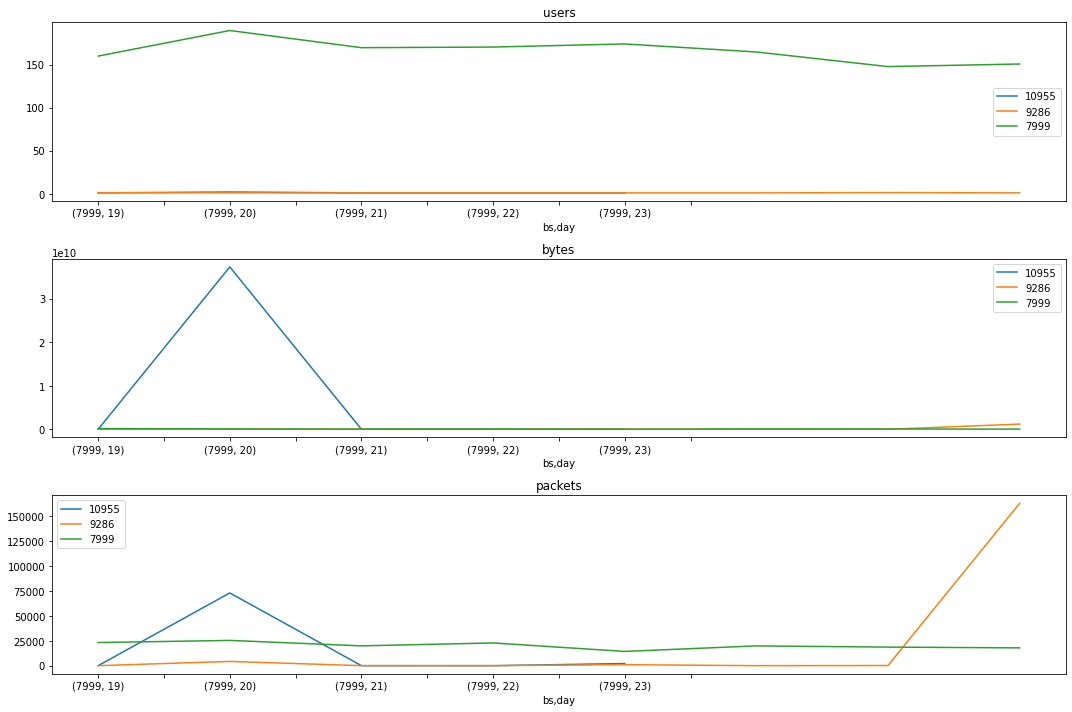

In [49]:
plt.subplot(3,1,1)
plt.title(f"users")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_bytes']]['users'].plot(label=bs_info['most_bytes'])
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_packets']]['users'].plot(label=bs_info['most_packets'])
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_user_access']]['users'].plot(label=bs_info['most_user_access'])
plt.legend()


plt.subplot(3,1,2)
plt.title(f"bytes")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_bytes']]['bytes'].plot(label=bs_info['most_bytes'])
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_packets']]['bytes'].plot(label=bs_info['most_packets'])
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_user_access']]['bytes'].plot(label=bs_info['most_user_access'])
plt.legend()

plt.subplot(3,1,3)
plt.title(f"packets")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_bytes']]['packets'].plot(label=bs_info['most_bytes'])
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_packets']]['packets'].plot(label=bs_info['most_packets'])
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_user_access']]['packets'].plot(label=bs_info['most_user_access'])

plt.legend()

plt.tight_layout()

In [50]:
day_traffic_data[day_traffic_data.index.get_level_values('bs') == 1].corr()

users   packets     bytes      hour
users    1.000000  0.437507 -0.322274  0.365065
packets  0.437507  1.000000  0.561259  0.523935
bytes   -0.322274  0.561259  1.000000  0.539563
hour     0.365065  0.523935  0.539563  1.000000

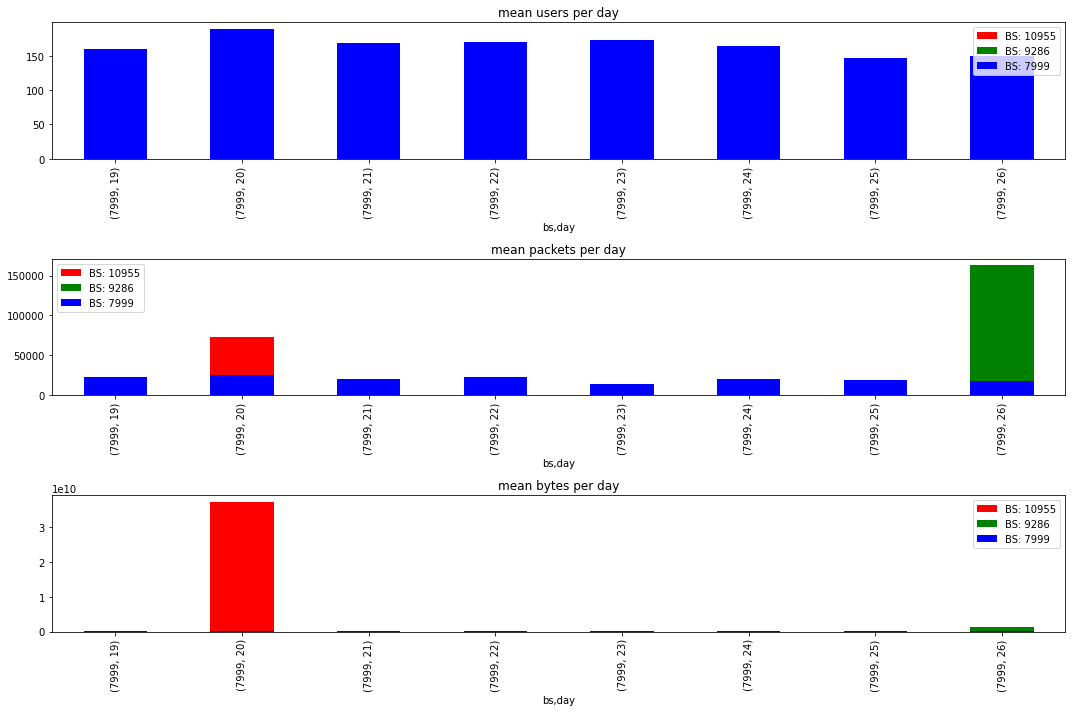

In [51]:
# exemplo de distribuição pra 2 estações diferentes
plt.subplot(3,1,1)
plt.title("mean users per day")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_bytes']]['users'].plot.bar(color='r', label = f"BS: {bs_info['most_bytes']}")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_packets']]['users'].plot.bar(color='g', label = f"BS: {bs_info['most_packets']}")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_user_access']]['users'].plot.bar(color='b', label = f"BS: {bs_info['most_user_access']}")
plt.legend()

plt.subplot(3,1,2)
plt.title("mean packets per day")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_bytes']]['packets'].plot.bar(color='r', label=f"BS: {bs_info['most_bytes']}")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_packets']]['packets'].plot.bar(color='g', label=f"BS: {bs_info['most_packets']}")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_user_access']]['packets'].plot.bar(color='b', label=f"BS: {bs_info['most_user_access']}")
plt.legend()

plt.subplot(3,1,3)
plt.title("mean bytes per day")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_bytes']]['bytes'].plot.bar(color='r', label=f"BS: {bs_info['most_bytes']}")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_packets']]['bytes'].plot.bar(color='g', label=f"BS: {bs_info['most_packets']}")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_user_access']]['bytes'].plot.bar(color='b', label=f"BS: {bs_info['most_user_access']}")
plt.legend()

plt.tight_layout()

## Per hour

In [52]:
hour_traffic_data = cellular_traffic_data.groupby(['bs', 'hour']).mean()
hour_traffic_data

users    packets         bytes    day
bs    hour                                          
1     0     1.250000  53.000000  54483.000000  22.50
      1     1.333333  21.666667  20593.666667  24.00
      2     1.250000  86.500000  92736.750000  23.50
      3     1.500000  58.750000  66064.250000  22.75
      4     1.000000  16.750000  18772.500000  23.50
...              ...        ...           ...    ...
13265 17    1.000000   1.000000     13.000000  26.00
13266 19    1.000000   1.000000    216.000000  26.00
13267 19    1.000000   0.000000      0.000000  26.00
13268 20    1.000000  26.000000  41028.000000  26.00
13269 22    1.000000   4.000000    608.000000  26.00

[269527 rows x 4 columns]

In [53]:
max_hour = hour_traffic_data.idxmax()

We can see that, among all 24 hours, the BS with more users connected at the same hour was **BS 7846** at 8AM.

In [54]:
hour_traffic_data[(hour_traffic_data.index.get_level_values('bs') == max_hour.users[0]) &
                 (hour_traffic_data.index.get_level_values('hour') == max_hour.users[1])]

users    packets         bytes   day
bs   hour                                        
7846 8     301.875  13758.375  1.846582e+08  22.5

The BS with more packets travelling was **BS 9286**, with a mean value of 251072 packets travelling at 2AM.

In [55]:
hour_traffic_data[(hour_traffic_data.index.get_level_values('bs') == max_hour.packets[0]) &
                 (hour_traffic_data.index.get_level_values('hour') == max_hour.packets[1])]

users   packets         bytes   day
bs   hour                                     
9286 2       1.0  251072.0  1.619578e+09  26.0

The BS with the largest packages travelling per hour was **BS 10955** with 3.726652e+10 bytes at 9AM.

In [56]:
hour_traffic_data[(hour_traffic_data.index.get_level_values('bs') == max_hour.bytes[0]) &
                 (hour_traffic_data.index.get_level_values('hour') == max_hour.bytes[1])]

users  packets         bytes   day
bs    hour                                    
10955 9       1.5  72910.5  3.726652e+10  23.0

In [57]:
bs_hour_info = {
    "most_user_access": max_hour.users[0],
    "most_bytes": max_hour.bytes[0],
    "most_packets": max_hour.packets[0]
}

bs_hour_info

{'most_user_access': 7846, 'most_bytes': 10955, 'most_packets': 9286}

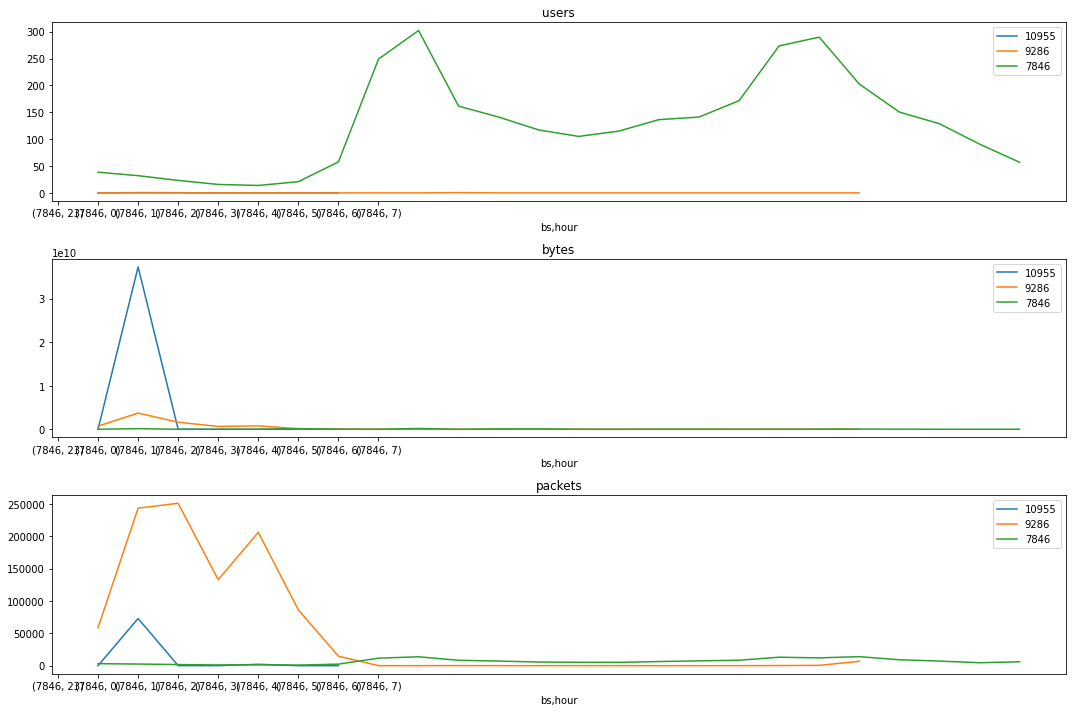

In [58]:
plt.subplot(3,1,1)
plt.title(f"users")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_bytes']]['users'].plot(label=bs_hour_info['most_bytes'])
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_packets']]['users'].plot(label=bs_hour_info['most_packets'])
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_user_access']]['users'].plot(label=bs_hour_info['most_user_access'])
plt.legend()


plt.subplot(3,1,2)
plt.title(f"bytes")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_bytes']]['bytes'].plot(label=bs_hour_info['most_bytes'])
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_packets']]['bytes'].plot(label=bs_hour_info['most_packets'])
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_user_access']]['bytes'].plot(label=bs_hour_info['most_user_access'])
plt.legend()

plt.subplot(3,1,3)
plt.title(f"packets")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_bytes']]['packets'].plot(label=bs_hour_info['most_bytes'])
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_packets']]['packets'].plot(label=bs_hour_info['most_packets'])
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_user_access']]['packets'].plot(label=bs_hour_info['most_user_access'])

plt.legend()

plt.tight_layout()

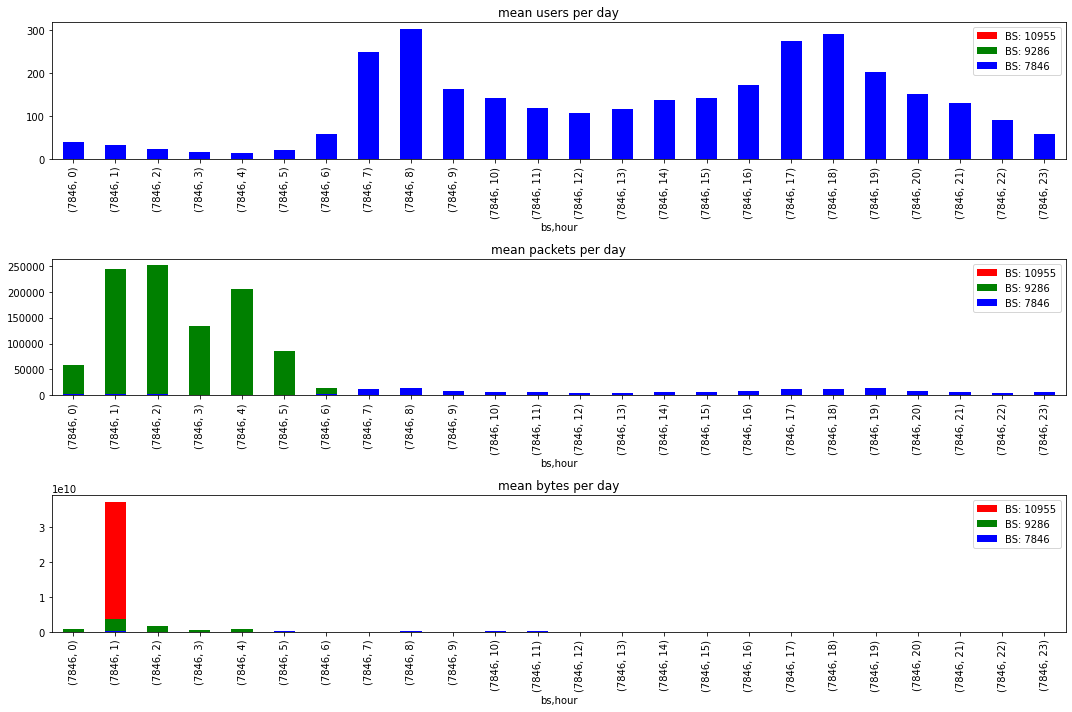

In [59]:
# exemplo de distribuição pra 2 estações diferentes
plt.subplot(3,1,1)
plt.title("mean users per day")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_bytes']]['users'].plot.bar(color='r', label = f"BS: {bs_hour_info['most_bytes']}")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_packets']]['users'].plot.bar(color='g', label = f"BS: {bs_hour_info['most_packets']}")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_user_access']]['users'].plot.bar(color='b', label = f"BS: {bs_hour_info['most_user_access']}")
plt.legend()

plt.subplot(3,1,2)
plt.title("mean packets per day")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_bytes']]['packets'].plot.bar(color='r', label=f"BS: {bs_hour_info['most_bytes']}")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_packets']]['packets'].plot.bar(color='g', label=f"BS: {bs_hour_info['most_packets']}")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_user_access']]['packets'].plot.bar(color='b', label=f"BS: {bs_hour_info['most_user_access']}")
plt.legend()

plt.subplot(3,1,3)
plt.title("mean bytes per day")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_bytes']]['bytes'].plot.bar(color='r', label=f"BS: {bs_hour_info['most_bytes']}")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_packets']]['bytes'].plot.bar(color='g', label=f"BS: {bs_hour_info['most_packets']}")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_user_access']]['bytes'].plot.bar(color='b', label=f"BS: {bs_hour_info['most_user_access']}")
plt.legend()

plt.tight_layout()

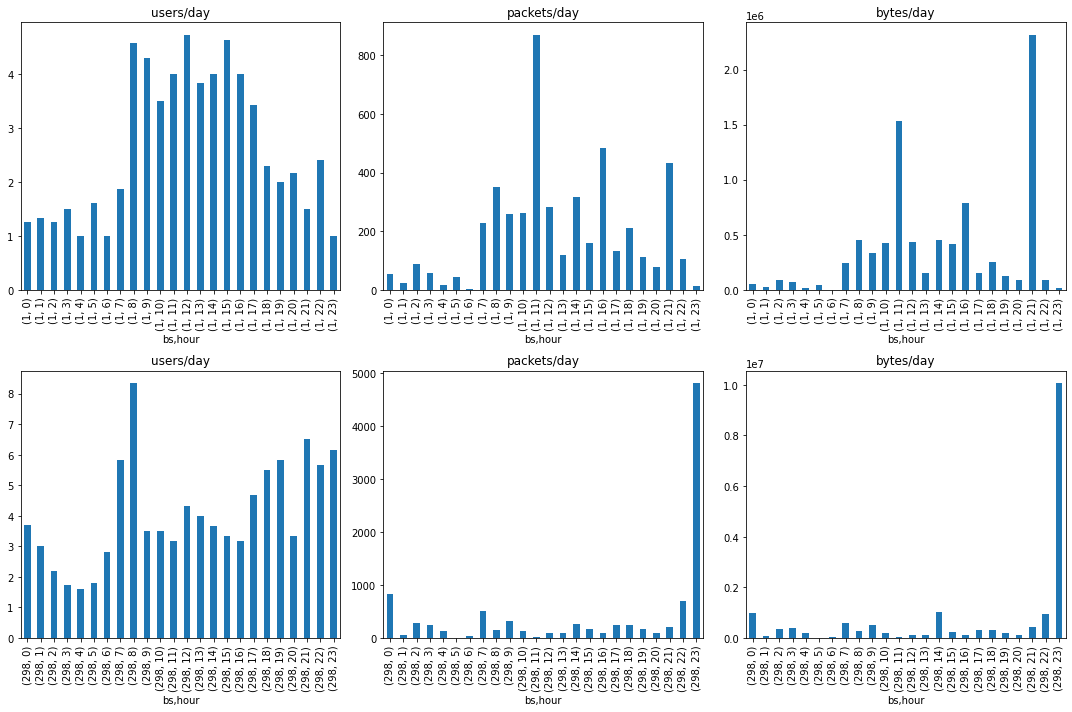

In [60]:
# exemplo de distribuição pra 2 estações diferente
plt.subplot(2,3,1)
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == 1]['users'].plot(kind='bar', title='users/day')
plt.subplot(2,3,2)
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == 1]['packets'].plot(kind='bar', title='packets/day')
plt.subplot(2,3,3)
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == 1]['bytes'].plot(kind='bar', title='bytes/day')

plt.subplot(2,3,4)
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == 298]['users'].plot(kind='bar', title='users/day')
plt.subplot(2,3,5)
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == 298]['packets'].plot(kind='bar', title='packets/day')
plt.subplot(2,3,6)
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == 298]['bytes'].plot(kind='bar', title='bytes/day')

plt.tight_layout()

# Is there any missing data?

Yes. Some of the base stations doesn't have all of the hours or even days with the measures of users, packets, bytes etc.

In [61]:
cellular_traffic_data[cellular_traffic_data['bs'] == 10955]

bs                 time_hour  users  packets         bytes  hour  \
76110    10955 2012-08-19 10:00:00+08:00      1        6  7.206000e+03    10   
483092   10955 2012-08-21 09:00:00+08:00      2   145801  7.453302e+10     9   
492954   10955 2012-08-21 10:00:00+08:00      2      274  2.070180e+05    10   
1103282  10955 2012-08-24 07:00:00+08:00      1       64  6.131600e+04     7   
1131801  10955 2012-08-24 10:00:00+08:00      1       12  1.320400e+04    10   
1229613  10955 2012-08-24 20:00:00+08:00      1        7  8.494000e+03    20   
1325507  10955 2012-08-25 09:00:00+08:00      1       20  2.314400e+04     9   
1359289  10955 2012-08-25 13:00:00+08:00      1       18  2.146000e+04    13   
1384137  10955 2012-08-25 16:00:00+08:00      1       13  1.446100e+04    16   
1546962  10955 2012-08-26 14:00:00+08:00      1     2167  2.724601e+06    14   

         day  
76110     19  
483092    21  
492954    21  
1103282   24  
1131801   24  
1229613   24  
1325507   25  
1359289   25  
1384137   25  
1546962   26

# Conclusions

What we could observate at the dataset is that we have some missing points that we couldn't explain if it was collection mistake or if there was no traffic at that point.

Another point that was noticed is that the topology does not correspond to the topology described by the authors. So, it was very hard to have any conclusions about the real traffic and if, for example, it had any special event during the collected days that gave any bias to the dataset.

In [62]:
cellular_traffic_data[(cellular_traffic_data['bs'] == 1) & (cellular_traffic_data['day'] == 19)]

bs                 time_hour  users  packets     bytes  hour  day
0        1 2012-08-19 00:00:00+08:00      1        3    3473.0     0   19
59405    1 2012-08-19 08:00:00+08:00      4       25    3948.0     8   19
68618    1 2012-08-19 09:00:00+08:00      4      196  253027.0     9   19
86792    1 2012-08-19 11:00:00+08:00      3      318  408036.0    11   19
97876    1 2012-08-19 12:00:00+08:00      6      473  532999.0    12   19
106271   1 2012-08-19 13:00:00+08:00      4      101  128178.0    13   19
115049   1 2012-08-19 14:00:00+08:00      3       19    8862.0    14   19
124465   1 2012-08-19 15:00:00+08:00      3       37   29365.0    15   19
131612   1 2012-08-19 16:00:00+08:00      1       17   15698.0    16   19
143260   1 2012-08-19 17:00:00+08:00      3       43   52694.0    17   19
152042   1 2012-08-19 18:00:00+08:00      2        6    3460.0    18   19
160239   1 2012-08-19 19:00:00+08:00      1        2     430.0    19   19
169497   1 2012-08-19 20:00:00+08:00      1        1     112.0    20   19

In [63]:
cellular_traffic_data.groupby(['day', 'hour', 'bs']).mean()

users  packets     bytes
day hour bs                             
19  0    1          1        3    3473.0
         2          1       12    2496.0
         3          1       18    5616.0
         4          1      113  156068.0
         5          1       19    5928.0
...               ...      ...       ...
26  23   13157      2       10   14439.0
         13158      1      105  137383.0
         13201      2       63   71037.0
         13206      1        2      32.0
         13233      1       84   85787.0

[1625680 rows x 3 columns]

In [64]:
cellular_traffic_data.groupby(['day', 'hour']).count()

bs  time_hour  users  packets  bytes
day hour                                        
19  0     7999       7999   7999     7999   7999
    1     7201       7201   7201     7201   7201
    2     6578       6578   6578     6578   6578
    3     6125       6125   6125     6125   6125
    4     6028       6028   6028     6028   6028
...        ...        ...    ...      ...    ...
26  19    8030       8030   8030     8030   8030
    20    7997       7997   7997     7997   7997
    21    7828       7828   7828     7828   7828
    22    7653       7653   7653     7653   7653
    23    6812       6812   6812     6812   6812

[192 rows x 5 columns]

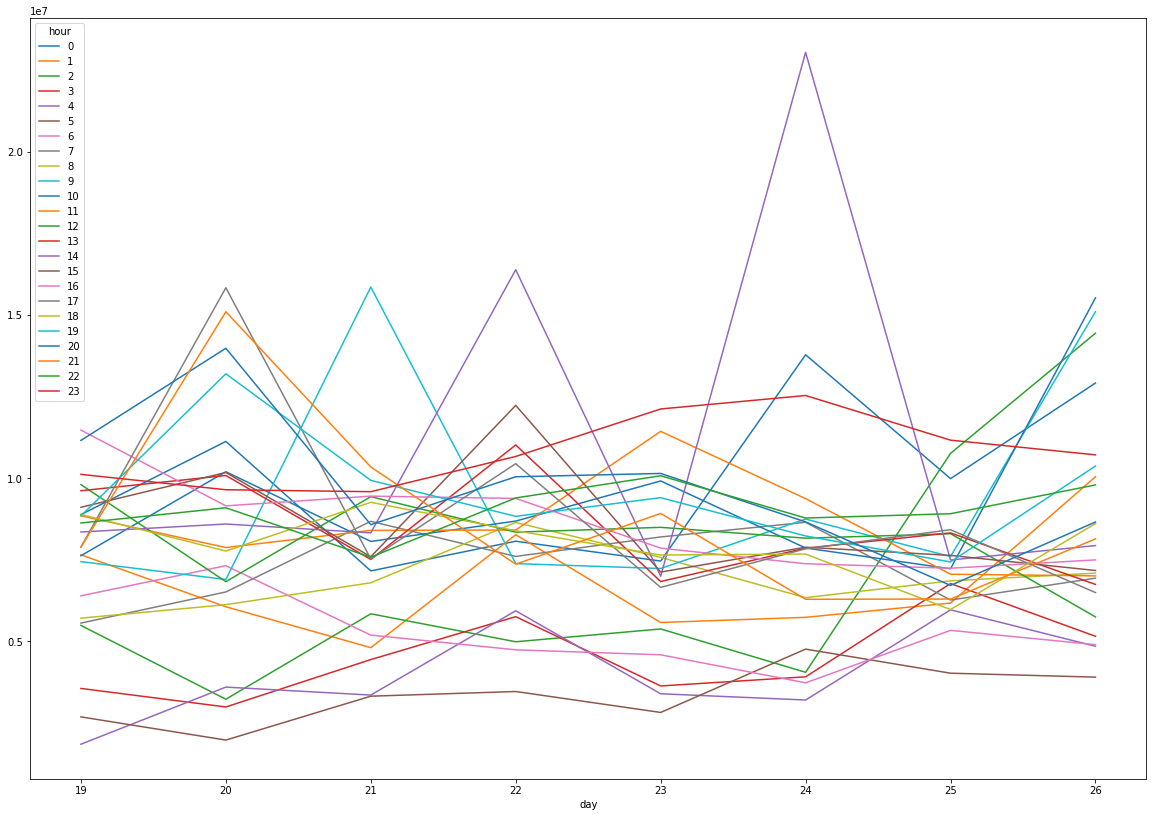

In [65]:
fig, ax = plt.subplots(figsize=(20,14))

cellular_traffic_data.groupby(['day', 'hour']).mean()['bytes'].unstack().plot(ax=ax)


In [66]:
topology_data

bs         lon        lat
0          1  111.247626  13.161971
1          2  111.209676  13.288072
2          3  111.210788  13.295707
3          4  111.203125  13.290818
4          5  111.215505  13.281345
...      ...         ...        ...
13264  13265  111.063918  13.198752
13265  13266  111.066573  13.039694
13266  13267  111.065121  13.107543
13267  13268  111.196631  13.205329
13268  13269  111.036413  13.168402

[13269 rows x 3 columns]

In [67]:
cellular_traffic_data

bs                 time_hour  users  packets        bytes  hour  \
0           1 2012-08-19 00:00:00+08:00      1        3       3473.0     0   
1           2 2012-08-19 00:00:00+08:00      1       12       2496.0     0   
2           3 2012-08-19 00:00:00+08:00      1       18       5616.0     0   
3           4 2012-08-19 00:00:00+08:00      1      113     156068.0     0   
4           5 2012-08-19 00:00:00+08:00      1       19       5928.0     0   
...       ...                       ...    ...      ...          ...   ...   
1625675  7993 2012-08-26 23:00:00+08:00    159    29125   41199852.0    23   
1625676  7995 2012-08-26 23:00:00+08:00    168    24182   36864079.0    23   
1625677  7997 2012-08-26 23:00:00+08:00    190    33781   78226635.0    23   
1625678  7998 2012-08-26 23:00:00+08:00    198    34345  228122304.0    23   
1625679  7999 2012-08-26 23:00:00+08:00    237    36725   67846985.0    23   

         day  
0         19  
1         19  
2         19  
3         19  
4         19  
...      ...  
1625675   26  
1625676   26  
1625677   26  
1625678   26  
1625679   26  

[1625680 rows x 7 columns]

In [68]:
from sklearn.cluster import KMeans

In [69]:
def find_clusters(data, k):
    mat = data[['lon', 'lat']]
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(mat)
    return kmeans.labels_, kmeans.cluster_centers_

In [70]:
topology_data['cluster'], _ = find_clusters(topology_data, 10)
topology_data

bs         lon        lat  cluster
0          1  111.247626  13.161971        2
1          2  111.209676  13.288072        6
2          3  111.210788  13.295707        6
3          4  111.203125  13.290818        6
4          5  111.215505  13.281345        6
...      ...         ...        ...      ...
13264  13265  111.063918  13.198752        1
13265  13266  111.066573  13.039694        8
13266  13267  111.065121  13.107543        5
13267  13268  111.196631  13.205329        2
13268  13269  111.036413  13.168402        1

[13269 rows x 4 columns]

In [71]:
clusters = []
centroid = {}
for i in range(0, 10):
    cluster_i = topology_data[topology_data["cluster"] == i]
    x, c = find_clusters(cluster_i, 3)
    clusters.extend(x)
    centroid[i] = c
#     clusters.append([cluster_i, centroid])

topology_data['rrh'] = clusters

In [72]:
for key, value in centroid.items():
    print(key, value)

0 [[110.97136167  13.12130212]
 [111.006128    13.15397374]
 [111.02815993  13.12046734]]
1 [[111.05292048  13.18789471]
 [111.03982379  13.1545312 ]
 [111.06677718  13.15996899]]
2 [[111.20005937  13.21513844]
 [111.23520889  13.18245464]
 [111.17390717  13.17773667]]
3 [[111.16277273  13.04923297]
 [111.19633425  13.09141752]
 [111.18880012  13.03692524]]
4 [[111.02097843  13.2034175 ]
 [110.99215308  13.27274303]
 [110.99187623  13.19299437]]
5 [[111.08174968  13.1157886 ]
 [111.11303306  13.14305056]
 [111.07926554  13.14008741]]
6 [[111.21217628  13.29636851]
 [111.11569946  13.33660532]
 [111.16620678  13.27934909]]
7 [[111.12107959  13.0748878 ]
 [111.08343494  13.07948986]
 [111.10150731  13.04905929]]
8 [[111.05935129  13.04803565]
 [110.99041985  13.04313463]
 [111.04230265  13.08230656]]
9 [[111.07321183  13.25429339]
 [111.12578532  13.20094387]
 [111.09002302  13.20589767]]


In [73]:
max_day_map = folium.Map(location = [topology_data['lat'].mean(), topology_data['lon'].mean()],
                 title = 'base station with max data per day')
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'gray', 'lightred', 'white', 'black', 'beige']
for i, clusters in centroid.items():
    for centroid in clusters:
        folium.Marker(location = [centroid[1], 
                                  centroid[0]], icon=folium.Icon(color=colors[i])).add_to(max_day_map)

max_day_map

In [74]:
topology_data

bs         lon        lat  cluster  rrh
0          1  111.247626  13.161971        2    1
1          2  111.209676  13.288072        6    1
2          3  111.210788  13.295707        6    1
3          4  111.203125  13.290818        6    1
4          5  111.215505  13.281345        6    0
...      ...         ...        ...      ...  ...
13264  13265  111.063918  13.198752        1    0
13265  13266  111.066573  13.039694        8    2
13266  13267  111.065121  13.107543        5    0
13267  13268  111.196631  13.205329        2    2
13268  13269  111.036413  13.168402        1    1

[13269 rows x 5 columns]

In [75]:
cluster_topology = pd.DataFrame(columns=["bs", 'lat', 'lon'])

for clusters in topology_data.groupby(['cluster']).mean().iterrows():
    cluster_topology = cluster_topology.append({'bs': f'fog_{clusters[0]}', 'lat': clusters[1]['lat'], 'lon': clusters[1]['lon']}, ignore_index=True)

In [76]:
cluster_topology

bs        lat         lon
0  fog_0  13.135445  111.003822
1  fog_1  13.165947  111.053027
2  fog_2  13.185916  111.201265
3  fog_3  13.050958  111.184211
4  fog_4  13.210947  111.001607
5  fog_5  13.132308  111.089967
6  fog_6  13.297556  111.196913
7  fog_7  13.068827  111.104981
8  fog_8  13.053520  111.036680
9  fog_9  13.212176  111.097523

In [77]:
for clusters in topology_data.groupby(['cluster', 'rrh']).mean().iterrows():
     cluster_topology = cluster_topology.append({'bs': f'rrh_{clusters[0][0]}_{clusters[0][1]}', 'lat': clusters[1]['lat'], 'lon': clusters[1]['lon']}, ignore_index=True)

In [78]:
cluster_topology

bs        lat         lon
0     fog_0  13.135445  111.003822
1     fog_1  13.165947  111.053027
2     fog_2  13.185916  111.201265
3     fog_3  13.050958  111.184211
4     fog_4  13.210947  111.001607
5     fog_5  13.132308  111.089967
6     fog_6  13.297556  111.196913
7     fog_7  13.068827  111.104981
8     fog_8  13.053520  111.036680
9     fog_9  13.212176  111.097523
10  rrh_0_0  13.134078  111.005558
11  rrh_0_1  13.135702  111.004048
12  rrh_0_2  13.136438  111.002075
13  rrh_1_0  13.164883  111.054345
14  rrh_1_1  13.165537  111.052372
15  rrh_1_2  13.167301  111.052290
16  rrh_2_0  13.187104  111.203724
17  rrh_2_1  13.183585  111.201230
18  rrh_2_2  13.186778  111.199030
19  rrh_3_0  13.051376  111.185413
20  rrh_3_1  13.051538  111.182661
21  rrh_3_2  13.050104  111.184360
22  rrh_4_0  13.211515  111.001467
23  rrh_4_1  13.210800  111.002693
24  rrh_4_2  13.210514  111.000974
25  rrh_5_0  13.130965  111.089250
26  rrh_5_1  13.132494  111.090073
27  rrh_5_2  13.133539  111.090619
28  rrh_6_0  13.297525  111.197616
29  rrh_6_1  13.296491  111.198631
30  rrh_6_2  13.298422  111.194923
31  rrh_7_0  13.069456  111.105287
32  rrh_7_1  13.067948  111.104878
33  rrh_7_2  13.069041  111.104783
34  rrh_8_0  13.054705  111.037262
35  rrh_8_1  13.053633  111.034036
36  rrh_8_2  13.052495  111.038647
37  rrh_9_0  13.216343  111.093028
38  rrh_9_1  13.212998  111.099824
39  rrh_9_2  13.209119  111.098947

In [80]:
bs_group_rrh = {}
count = 0
for i in range(0, 10):
    cluster = topology_data[topology_data.cluster==i]
    for j in range(0, 3):
        bs_group_rrh[count] = cluster[cluster.rrh == j]
        count = count + 1
    
bs_group_rrh

{0:           bs         lon        lat  cluster  rrh
 94        95  110.977784  13.166770        0    0
 439      440  111.028791  13.115890        0    0
 441      442  111.040999  13.113254        0    0
 442      443  111.009309  13.116583        0    0
 476      477  110.991697  13.162453        0    0
 ...      ...         ...        ...      ...  ...
 13114  13115  111.043562  13.106101        0    0
 13126  13127  110.998258  13.098894        0    0
 13231  13232  110.989708  13.129424        0    0
 13258  13259  111.017989  13.097690        0    0
 13262  13263  111.024451  13.133765        0    0
 
 [371 rows x 5 columns],
 1:           bs         lon        lat  cluster  rrh
 82        83  110.999755  13.170127        0    1
 129      130  110.964636  13.076711        0    1
 418      419  111.038031  13.125088        0    1
 419      420  111.029550  13.122639        0    1
 421      422  111.034805  13.120602        0    1
 ...      ...         ...        ...      ...  ..

In [81]:
df1 = topology_data[['bs', 'cluster', 'rrh']]
# df1
cellular_traffic_data = pd.merge(cellular_traffic_data, df1, on='bs', right_index=False, how='left', sort=False)
# cellular_traffic_data

In [82]:
import random

for i in range(0, 200):
    i_aleatorio = random.randint(0, 13269)
    cluster_t = topology_data[topology_data.bs==i_aleatorio].cluster.values[0]
    rrh_t = topology_data[topology_data.bs==i_aleatorio].rrh.values[0]

    cluster_c = cellular_traffic_data[cellular_traffic_data.bs==i_aleatorio].iloc[0].cluster
    rrh_c = cellular_traffic_data[cellular_traffic_data.bs==i_aleatorio].iloc[0].rrh

    assert cluster_t == cluster_c
    assert rrh_t== rrh_c

In [83]:
cellular_traffic_data

bs                 time_hour  users  packets        bytes  hour  \
0           1 2012-08-19 00:00:00+08:00      1        3       3473.0     0   
1           2 2012-08-19 00:00:00+08:00      1       12       2496.0     0   
2           3 2012-08-19 00:00:00+08:00      1       18       5616.0     0   
3           4 2012-08-19 00:00:00+08:00      1      113     156068.0     0   
4           5 2012-08-19 00:00:00+08:00      1       19       5928.0     0   
...       ...                       ...    ...      ...          ...   ...   
1625675  7993 2012-08-26 23:00:00+08:00    159    29125   41199852.0    23   
1625676  7995 2012-08-26 23:00:00+08:00    168    24182   36864079.0    23   
1625677  7997 2012-08-26 23:00:00+08:00    190    33781   78226635.0    23   
1625678  7998 2012-08-26 23:00:00+08:00    198    34345  228122304.0    23   
1625679  7999 2012-08-26 23:00:00+08:00    237    36725   67846985.0    23   

         day  cluster  rrh  
0         19        2    1  
1         19        6    1  
2         19        6    1  
3         19        6    1  
4         19        6    0  
...      ...      ...  ...  
1625675   26        5    1  
1625676   26        5    1  
1625677   26        5    1  
1625678   26        9    0  
1625679   26        5    0  

[1625680 rows x 9 columns]

In [84]:
for i in cellular_traffic_data.groupby(['cluster', 'rrh', 'time_hour']).sum().iterrows():
    print(i)

((0, 0, Timestamp('2012-08-19 00:00:00+0800', tz='Asia/Shanghai')), bs         7.858140e+05
users      1.866000e+03
packets    3.984690e+05
bytes      1.137178e+09
hour       0.000000e+00
day        3.743000e+03
Name: (0, 0, 2012-08-19 00:00:00+08:00), dtype: float64)
((0, 0, Timestamp('2012-08-19 01:00:00+0800', tz='Asia/Shanghai')), bs         8.034170e+05
users      1.214000e+03
packets    3.251930e+05
bytes      1.230898e+09
hour       1.770000e+02
day        3.363000e+03
Name: (0, 0, 2012-08-19 01:00:00+08:00), dtype: float64)
((0, 0, Timestamp('2012-08-19 02:00:00+0800', tz='Asia/Shanghai')), bs            771357.0
users            892.0
packets       153221.0
bytes      482349336.0
hour             316.0
day             3002.0
Name: (0, 0, 2012-08-19 02:00:00+08:00), dtype: float64)
((0, 0, Timestamp('2012-08-19 03:00:00+0800', tz='Asia/Shanghai')), bs            760520.0
users            695.0
packets        94484.0
bytes      233150338.0
hour             438.0
day             

Name: (0, 1, 2012-08-24 21:00:00+08:00), dtype: float64)
((0, 1, Timestamp('2012-08-24 22:00:00+0800', tz='Asia/Shanghai')), bs         1.135386e+06
users      2.872000e+03
packets    4.286240e+05
bytes      1.411056e+09
hour       5.434000e+03
day        5.928000e+03
Name: (0, 1, 2012-08-24 22:00:00+08:00), dtype: float64)
((0, 1, Timestamp('2012-08-24 23:00:00+0800', tz='Asia/Shanghai')), bs         1.076802e+06
users      2.358000e+03
packets    5.003780e+05
bytes      2.310967e+09
hour       5.497000e+03
day        5.736000e+03
Name: (0, 1, 2012-08-24 23:00:00+08:00), dtype: float64)
((0, 1, Timestamp('2012-08-25 00:00:00+0800', tz='Asia/Shanghai')), bs         1.046495e+06
users      1.852000e+03
packets    3.897160e+05
bytes      1.131828e+09
hour       0.000000e+00
day        5.500000e+03
Name: (0, 1, 2012-08-25 00:00:00+08:00), dtype: float64)
((0, 1, Timestamp('2012-08-25 01:00:00+0800', tz='Asia/Shanghai')), bs           1001340.0
users           1237.0
packets       214343.0

Name: (1, 0, 2012-08-21 11:00:00+08:00), dtype: float64)
((1, 0, Timestamp('2012-08-21 12:00:00+0800', tz='Asia/Shanghai')), bs         4.251643e+06
users      1.283600e+04
packets    1.712475e+06
bytes      7.809769e+09
hour       8.724000e+03
day        1.526700e+04
Name: (1, 0, 2012-08-21 12:00:00+08:00), dtype: float64)
((1, 0, Timestamp('2012-08-21 13:00:00+0800', tz='Asia/Shanghai')), bs         4.245428e+06
users      1.188700e+04
packets    1.456654e+06
bytes      8.271424e+09
hour       9.451000e+03
day        1.526700e+04
Name: (1, 0, 2012-08-21 13:00:00+08:00), dtype: float64)
((1, 0, Timestamp('2012-08-21 14:00:00+0800', tz='Asia/Shanghai')), bs         4.282920e+06
users      1.195700e+04
packets    1.322414e+06
bytes      6.434687e+09
hour       1.019200e+04
day        1.528800e+04
Name: (1, 0, 2012-08-21 14:00:00+08:00), dtype: float64)
((1, 0, Timestamp('2012-08-21 15:00:00+0800', tz='Asia/Shanghai')), bs         4.179542e+06
users      1.258500e+04
packets    1.443192e

Name: (1, 2, 2012-08-19 04:00:00+08:00), dtype: float64)
((1, 2, Timestamp('2012-08-19 05:00:00+0800', tz='Asia/Shanghai')), bs         2.895219e+06
users      2.680000e+03
packets    3.323190e+05
bytes      2.146481e+09
hour       2.845000e+03
day        1.081100e+04
Name: (1, 2, 2012-08-19 05:00:00+08:00), dtype: float64)
((1, 2, Timestamp('2012-08-19 06:00:00+0800', tz='Asia/Shanghai')), bs         3.051668e+06
users      4.224000e+03
packets    6.246970e+05
bytes      1.662323e+09
hour       3.702000e+03
day        1.172300e+04
Name: (1, 2, 2012-08-19 06:00:00+08:00), dtype: float64)
((1, 2, Timestamp('2012-08-19 07:00:00+0800', tz='Asia/Shanghai')), bs         3.422403e+06
users      7.919000e+03
packets    1.046365e+06
bytes      3.115475e+09
hour       4.809000e+03
day        1.305300e+04
Name: (1, 2, 2012-08-19 07:00:00+08:00), dtype: float64)
((1, 2, Timestamp('2012-08-19 08:00:00+0800', tz='Asia/Shanghai')), bs         3.999814e+06
users      1.124800e+04
packets    1.281697e

Name: (2, 0, 2012-08-25 18:00:00+08:00), dtype: float64)
((2, 0, Timestamp('2012-08-25 19:00:00+0800', tz='Asia/Shanghai')), bs           1008704.0
users           1327.0
packets       144896.0
bytes      369829827.0
hour            3325.0
day             4375.0
Name: (2, 0, 2012-08-25 19:00:00+08:00), dtype: float64)
((2, 0, Timestamp('2012-08-25 20:00:00+0800', tz='Asia/Shanghai')), bs           1011008.0
users           1249.0
packets       133414.0
bytes      312426325.0
hour            3560.0
day             4450.0
Name: (2, 0, 2012-08-25 20:00:00+08:00), dtype: float64)
((2, 0, Timestamp('2012-08-25 21:00:00+0800', tz='Asia/Shanghai')), bs         9.913680e+05
users      1.222000e+03
packets    1.418230e+05
bytes      1.641059e+09
hour       3.612000e+03
day        4.300000e+03
Name: (2, 0, 2012-08-25 21:00:00+08:00), dtype: float64)
((2, 0, Timestamp('2012-08-25 22:00:00+0800', tz='Asia/Shanghai')), bs            980435.0
users           1172.0
packets       177977.0
bytes      

Name: (2, 2, 2012-08-22 00:00:00+08:00), dtype: float64)
((2, 2, Timestamp('2012-08-22 01:00:00+0800', tz='Asia/Shanghai')), bs            865207.0
users            790.0
packets       122753.0
bytes      371787969.0
hour             183.0
day             4026.0
Name: (2, 2, 2012-08-22 01:00:00+08:00), dtype: float64)
((2, 2, Timestamp('2012-08-22 02:00:00+0800', tz='Asia/Shanghai')), bs            818336.0
users            575.0
packets        70996.0
bytes      162186593.0
hour             354.0
day             3894.0
Name: (2, 2, 2012-08-22 02:00:00+08:00), dtype: float64)
((2, 2, Timestamp('2012-08-22 03:00:00+0800', tz='Asia/Shanghai')), bs            761029.0
users            501.0
packets       100706.0
bytes      265738311.0
hour             492.0
day             3608.0
Name: (2, 2, 2012-08-22 03:00:00+08:00), dtype: float64)
((2, 2, Timestamp('2012-08-22 04:00:00+0800', tz='Asia/Shanghai')), bs            746551.0
users            463.0
packets        84070.0
bytes      212963

Name: (3, 1, 2012-08-20 05:00:00+08:00), dtype: float64)
((3, 1, Timestamp('2012-08-20 06:00:00+0800', tz='Asia/Shanghai')), bs           222827.0
users           159.0
packets       11264.0
bytes      31784242.0
hour            384.0
day            1280.0
Name: (3, 1, 2012-08-20 06:00:00+08:00), dtype: float64)
((3, 1, Timestamp('2012-08-20 07:00:00+0800', tz='Asia/Shanghai')), bs           311670.0
users           263.0
packets       21375.0
bytes      27600420.0
hour            553.0
day            1580.0
Name: (3, 1, 2012-08-20 07:00:00+08:00), dtype: float64)
((3, 1, Timestamp('2012-08-20 08:00:00+0800', tz='Asia/Shanghai')), bs           424461.0
users           261.0
packets       34337.0
bytes      45451380.0
hour            744.0
day            1860.0
Name: (3, 1, 2012-08-20 08:00:00+08:00), dtype: float64)
((3, 1, Timestamp('2012-08-20 09:00:00+0800', tz='Asia/Shanghai')), bs           393281.0
users           230.0
packets       29851.0
bytes      41069281.0
hour            

Name: (4, 1, 2012-08-24 05:00:00+08:00), dtype: float64)
((4, 1, Timestamp('2012-08-24 06:00:00+0800', tz='Asia/Shanghai')), bs            692933.0
users            980.0
packets       109267.0
bytes      592158376.0
hour             990.0
day             3960.0
Name: (4, 1, 2012-08-24 06:00:00+08:00), dtype: float64)
((4, 1, Timestamp('2012-08-24 07:00:00+0800', tz='Asia/Shanghai')), bs         7.934420e+05
users      1.938000e+03
packets    2.038570e+05
bytes      1.067680e+09
hour       1.309000e+03
day        4.488000e+03
Name: (4, 1, 2012-08-24 07:00:00+08:00), dtype: float64)
((4, 1, Timestamp('2012-08-24 08:00:00+0800', tz='Asia/Shanghai')), bs            932266.0
users           2218.0
packets       176794.0
bytes      471378263.0
hour            1632.0
day             4896.0
Name: (4, 1, 2012-08-24 08:00:00+08:00), dtype: float64)
((4, 1, Timestamp('2012-08-24 09:00:00+0800', tz='Asia/Shanghai')), bs            910408.0
users           1816.0
packets       221654.0
bytes      

Name: (5, 0, 2012-08-24 20:00:00+08:00), dtype: float64)
((5, 0, Timestamp('2012-08-24 21:00:00+0800', tz='Asia/Shanghai')), bs         4.976929e+06
users      1.834400e+04
packets    2.089110e+06
bytes      7.044450e+09
hour       1.793400e+04
day        2.049600e+04
Name: (5, 0, 2012-08-24 21:00:00+08:00), dtype: float64)
((5, 0, Timestamp('2012-08-24 22:00:00+0800', tz='Asia/Shanghai')), bs         4.724538e+06
users      1.570500e+04
packets    2.101820e+06
bytes      7.906652e+09
hour       1.834800e+04
day        2.001600e+04
Name: (5, 0, 2012-08-24 22:00:00+08:00), dtype: float64)
((5, 0, Timestamp('2012-08-24 23:00:00+0800', tz='Asia/Shanghai')), bs         4.421888e+06
users      1.343300e+04
packets    2.675748e+06
bytes      1.567635e+10
hour       1.805500e+04
day        1.884000e+04
Name: (5, 0, 2012-08-24 23:00:00+08:00), dtype: float64)
((5, 0, Timestamp('2012-08-25 00:00:00+0800', tz='Asia/Shanghai')), bs         4.111719e+06
users      1.032900e+04
packets    2.349883e

Name: (5, 2, 2012-08-19 17:00:00+08:00), dtype: float64)
((5, 2, Timestamp('2012-08-19 18:00:00+0800', tz='Asia/Shanghai')), bs         4.699716e+06
users      2.329600e+04
packets    2.578648e+06
bytes      9.470064e+09
hour       1.576800e+04
day        1.664400e+04
Name: (5, 2, 2012-08-19 18:00:00+08:00), dtype: float64)
((5, 2, Timestamp('2012-08-19 19:00:00+0800', tz='Asia/Shanghai')), bs         4.577198e+06
users      2.158100e+04
packets    2.612846e+06
bytes      1.121557e+10
hour       1.632100e+04
day        1.632100e+04
Name: (5, 2, 2012-08-19 19:00:00+08:00), dtype: float64)
((5, 2, Timestamp('2012-08-19 20:00:00+0800', tz='Asia/Shanghai')), bs         4.497802e+06
users      2.073100e+04
packets    2.433595e+06
bytes      1.097090e+10
hour       1.700000e+04
day        1.615000e+04
Name: (5, 2, 2012-08-19 20:00:00+08:00), dtype: float64)
((5, 2, Timestamp('2012-08-19 21:00:00+0800', tz='Asia/Shanghai')), bs         4.449354e+06
users      1.893000e+04
packets    2.177922e

Name: (6, 1, 2012-08-19 11:00:00+08:00), dtype: float64)
((6, 1, Timestamp('2012-08-19 12:00:00+0800', tz='Asia/Shanghai')), bs            280274.0
users            213.0
packets        36347.0
bytes      394475705.0
hour             708.0
day             1121.0
Name: (6, 1, 2012-08-19 12:00:00+08:00), dtype: float64)
((6, 1, Timestamp('2012-08-19 13:00:00+0800', tz='Asia/Shanghai')), bs           224022.0
users           227.0
packets       39513.0
bytes      56153527.0
hour            767.0
day            1121.0
Name: (6, 1, 2012-08-19 13:00:00+08:00), dtype: float64)
((6, 1, Timestamp('2012-08-19 14:00:00+0800', tz='Asia/Shanghai')), bs           275521.0
users           231.0
packets       42218.0
bytes      66044674.0
hour            896.0
day            1216.0
Name: (6, 1, 2012-08-19 14:00:00+08:00), dtype: float64)
((6, 1, Timestamp('2012-08-19 15:00:00+0800', tz='Asia/Shanghai')), bs           262411.0
users           231.0
packets       25639.0
bytes      41958670.0
hour      

Name: (7, 0, 2012-08-21 00:00:00+08:00), dtype: float64)
((7, 0, Timestamp('2012-08-21 01:00:00+0800', tz='Asia/Shanghai')), bs            759582.0
users            755.0
packets        78273.0
bytes      318729357.0
hour             136.0
day             2856.0
Name: (7, 0, 2012-08-21 01:00:00+08:00), dtype: float64)
((7, 0, Timestamp('2012-08-21 02:00:00+0800', tz='Asia/Shanghai')), bs           655614.0
users           572.0
packets       65021.0
bytes      83964833.0
hour            240.0
day            2520.0
Name: (7, 0, 2012-08-21 02:00:00+08:00), dtype: float64)
((7, 0, Timestamp('2012-08-21 03:00:00+0800', tz='Asia/Shanghai')), bs            595694.0
users            485.0
packets        42555.0
bytes      323564187.0
hour             336.0
day             2352.0
Name: (7, 0, 2012-08-21 03:00:00+08:00), dtype: float64)
((7, 0, Timestamp('2012-08-21 04:00:00+0800', tz='Asia/Shanghai')), bs            615714.0
users            466.0
packets        29438.0
bytes      111909067.0


Name: (7, 1, 2012-08-26 19:00:00+08:00), dtype: float64)
((7, 1, Timestamp('2012-08-26 20:00:00+0800', tz='Asia/Shanghai')), bs            734367.0
users           1999.0
packets       224217.0
bytes      807551637.0
hour            3660.0
day             4758.0
Name: (7, 1, 2012-08-26 20:00:00+08:00), dtype: float64)
((7, 1, Timestamp('2012-08-26 21:00:00+0800', tz='Asia/Shanghai')), bs            743316.0
users           1757.0
packets       183692.0
bytes      449043729.0
hour            3822.0
day             4732.0
Name: (7, 1, 2012-08-26 21:00:00+08:00), dtype: float64)
((7, 1, Timestamp('2012-08-26 22:00:00+0800', tz='Asia/Shanghai')), bs         7.698310e+05
users      1.467000e+03
packets    2.131510e+05
bytes      2.601587e+09
hour       3.916000e+03
day        4.628000e+03
Name: (7, 1, 2012-08-26 22:00:00+08:00), dtype: float64)
((7, 1, Timestamp('2012-08-26 23:00:00+0800', tz='Asia/Shanghai')), bs            584447.0
users           1138.0
packets       177925.0
bytes      

Name: (8, 0, 2012-08-24 18:00:00+08:00), dtype: float64)
((8, 0, Timestamp('2012-08-24 19:00:00+0800', tz='Asia/Shanghai')), bs         1.085217e+06
users      1.376000e+03
packets    1.494090e+05
bytes      1.272214e+09
hour       3.230000e+03
day        4.080000e+03
Name: (8, 0, 2012-08-24 19:00:00+08:00), dtype: float64)
((8, 0, Timestamp('2012-08-24 20:00:00+0800', tz='Asia/Shanghai')), bs            948516.0
users           1163.0
packets       133865.0
bytes      426071056.0
hour            3160.0
day             3792.0
Name: (8, 0, 2012-08-24 20:00:00+08:00), dtype: float64)
((8, 0, Timestamp('2012-08-24 21:00:00+0800', tz='Asia/Shanghai')), bs            865118.0
users           1104.0
packets       117797.0
bytes      518998330.0
hour            3213.0
day             3672.0
Name: (8, 0, 2012-08-24 21:00:00+08:00), dtype: float64)
((8, 0, Timestamp('2012-08-24 22:00:00+0800', tz='Asia/Shanghai')), bs            792273.0
users           1011.0
packets       124888.0
bytes      

Name: (8, 2, 2012-08-26 10:00:00+08:00), dtype: float64)
((8, 2, Timestamp('2012-08-26 11:00:00+0800', tz='Asia/Shanghai')), bs         1.379234e+06
users      2.441000e+03
packets    2.565450e+05
bytes      1.044342e+09
hour       2.882000e+03
day        6.812000e+03
Name: (8, 2, 2012-08-26 11:00:00+08:00), dtype: float64)
((8, 2, Timestamp('2012-08-26 12:00:00+0800', tz='Asia/Shanghai')), bs         1.277798e+06
users      2.427000e+03
packets    2.609870e+05
bytes      1.429534e+09
hour       2.976000e+03
day        6.448000e+03
Name: (8, 2, 2012-08-26 12:00:00+08:00), dtype: float64)
((8, 2, Timestamp('2012-08-26 13:00:00+0800', tz='Asia/Shanghai')), bs         1.281815e+06
users      2.230000e+03
packets    2.309140e+05
bytes      1.163949e+09
hour       3.211000e+03
day        6.422000e+03
Name: (8, 2, 2012-08-26 13:00:00+08:00), dtype: float64)
((8, 2, Timestamp('2012-08-26 14:00:00+0800', tz='Asia/Shanghai')), bs           1256572.0
users           2310.0
packets       218715.0

Name: (9, 2, 2012-08-25 16:00:00+08:00), dtype: float64)
((9, 2, Timestamp('2012-08-25 17:00:00+0800', tz='Asia/Shanghai')), bs         2.504364e+06
users      6.815000e+03
packets    6.521550e+05
bytes      5.233492e+09
hour       5.746000e+03
day        8.450000e+03
Name: (9, 2, 2012-08-25 17:00:00+08:00), dtype: float64)
((9, 2, Timestamp('2012-08-25 18:00:00+0800', tz='Asia/Shanghai')), bs         2.536635e+06
users      6.605000e+03
packets    5.888860e+05
bytes      3.092945e+09
hour       6.210000e+03
day        8.625000e+03
Name: (9, 2, 2012-08-25 18:00:00+08:00), dtype: float64)
((9, 2, Timestamp('2012-08-25 19:00:00+0800', tz='Asia/Shanghai')), bs         2.552187e+06
users      6.154000e+03
packets    6.249190e+05
bytes      2.828464e+09
hour       6.536000e+03
day        8.600000e+03
Name: (9, 2, 2012-08-25 19:00:00+08:00), dtype: float64)
((9, 2, Timestamp('2012-08-25 20:00:00+0800', tz='Asia/Shanghai')), bs         2.489920e+06
users      6.199000e+03
packets    6.389260e

In [167]:
cluster_traffic_data = pd.DataFrame(columns=["bs", 'time_hour', 'users', 'packets', 'bytes'])
for clusters in cellular_traffic_data.groupby(['cluster', 'time_hour']).sum().iterrows():
     cluster_traffic_data = cluster_traffic_data.append({
         'bs': f'fog_{clusters[0][0]}', 
         'time_hour': clusters[0][1], 
         'users': clusters[1]['users'], 
         'packets': clusters[1]['packets'], 
         'bytes': clusters[1]['bytes']},
         ignore_index=True)
        
for clusters in cellular_traffic_data.groupby(['cluster', 'rrh', 'time_hour']).sum().iterrows():
     cluster_traffic_data = cluster_traffic_data.append({
         'bs': f'rrh_{clusters[0][0]}_{clusters[0][1]}', 
         'time_hour': clusters[0][2], 'users': clusters[1]['users'], 
         'packets': clusters[1]['packets'], 'bytes': clusters[1]['bytes']}, ignore_index=True)

In [168]:
cluster_traffic_data

bs                  time_hour   users    packets         bytes
0       fog_0  2012-08-19 00:00:00+08:00  5632.0  1301233.0  3.452667e+09
1       fog_0  2012-08-19 01:00:00+08:00  3642.0   848671.0  3.208073e+09
2       fog_0  2012-08-19 02:00:00+08:00  2661.0   492921.0  1.245052e+09
3       fog_0  2012-08-19 03:00:00+08:00  2034.0   334814.0  8.120365e+08
4       fog_0  2012-08-19 04:00:00+08:00  1941.0   302677.0  8.812735e+08
...       ...                        ...     ...        ...           ...
7675  rrh_9_2  2012-08-26 19:00:00+08:00  6281.0   678253.0  1.858395e+09
7676  rrh_9_2  2012-08-26 20:00:00+08:00  6699.0   704520.0  3.529260e+09
7677  rrh_9_2  2012-08-26 21:00:00+08:00  6707.0   669901.0  3.891404e+09
7678  rrh_9_2  2012-08-26 22:00:00+08:00  6519.0   779178.0  2.311602e+09
7679  rrh_9_2  2012-08-26 23:00:00+08:00  5622.0  1118647.0  8.290748e+09

[7680 rows x 5 columns]

In [169]:
cluster_traffic_data.to_csv('cluster_traffic.csv', index=False)

In [157]:
# for i in cluster_topology.itertuples(index=False):
#     if "fog" in i[0]:
#         cluster_number = int(i[0].split('_')[1])
#         tmp = cellular_traffic_data[cellular_traffic_data["cluster"] == cluster_number]
# #         cluster_traffic_data.append([i[0]])

           bs                 time_hour  users  packets       bytes  hour  \
71         72 2012-08-19 00:00:00+08:00      1      283    360044.0     0   
72         73 2012-08-19 00:00:00+08:00      1       69     95789.0     0   
82         83 2012-08-19 00:00:00+08:00      1       75     49661.0     0   
94         95 2012-08-19 00:00:00+08:00      1       21     25455.0     0   
129       130 2012-08-19 00:00:00+08:00      1        1         0.0     0   
...       ...                       ...    ...      ...         ...   ...   
1625599  7889 2012-08-26 23:00:00+08:00     72    10508  28121005.0    23   
1625617  7915 2012-08-26 23:00:00+08:00     77    35406  75008845.0    23   
1625619  7871 2012-08-26 23:00:00+08:00     78    13178  19911557.0    23   
1625636  7953 2012-08-26 23:00:00+08:00     86    25285  49609427.0    23   
1625644  7955 2012-08-26 23:00:00+08:00     90     8832  12271697.0    23   

         day  cluster  rrh  
71        19        0    2  
72        19     

           bs                 time_hour  users  packets        bytes  hour  \
132       133 2012-08-19 00:00:00+08:00      1       91     106500.0     0   
133       134 2012-08-19 00:00:00+08:00      1        1        305.0     0   
136       137 2012-08-19 00:00:00+08:00      1        1         14.0     0   
137       138 2012-08-19 00:00:00+08:00      1       13      15912.0     0   
139       140 2012-08-19 00:00:00+08:00      1        2          2.0     0   
...       ...                       ...    ...      ...          ...   ...   
1625659  7986 2012-08-26 23:00:00+08:00    104     9663   14768681.0    23   
1625663  7984 2012-08-26 23:00:00+08:00    109    24155   39713161.0    23   
1625665  7972 2012-08-26 23:00:00+08:00    117    11695   15975266.0    23   
1625666  7992 2012-08-26 23:00:00+08:00    118    21559   46380578.0    23   
1625678  7998 2012-08-26 23:00:00+08:00    198    34345  228122304.0    23   

         day  cluster  rrh  
132       19        9    1  
133  

In [93]:
import scripts.utils as u

In [91]:
%load_ext autoreload
%autoreload 2

In [98]:
cel_data, top_data = u.load_data()

In [147]:
clu_top_data, top_data = u.create_clustered_topology_df(top_data, 10, 3, True)

finding fogs clusters
generating fogs
dataframe saved in /home/giovana/Documentos/personal/city-cellular-traffic-map/data/topology_with_clusters_and_rrhs_info.csv
dataframe saved in /home/giovana/Documentos/personal/city-cellular-traffic-map/data/clustered_topology.csv


In [148]:
clu_cel_data, full_data = u.create_clustered_cellular_df(cel_data, top_data, 10, 3, True)

merging dataframes
dataframe saved in /home/giovana/Documentos/personal/city-cellular-traffic-map/data/cellular_traffic_with_cluster_info.csv
dataframe saved in /home/giovana/Documentos/personal/city-cellular-traffic-map/data/clustered_traffic_data.csv


In [142]:
full_data

bs   time_hour  users  packets        bytes  cluster  rrh
0           1  1345305600      1        3       3473.0        2    1
1           2  1345305600      1       12       2496.0        6    1
2           3  1345305600      1       18       5616.0        6    1
3           4  1345305600      1      113     156068.0        6    1
4           5  1345305600      1       19       5928.0        6    0
...       ...         ...    ...      ...          ...      ...  ...
1625675  7993  1345993200    159    29125   41199852.0        5    1
1625676  7995  1345993200    168    24182   36864079.0        5    1
1625677  7997  1345993200    190    33781   78226635.0        5    1
1625678  7998  1345993200    198    34345  228122304.0        9    0
1625679  7999  1345993200    237    36725   67846985.0        5    0

[1625680 rows x 7 columns]

In [54]:
pivot = pd.pivot_table(cellular_traffic_data, index='time_hour', columns='bs', values='users', fill_value=0)
zero_count = (pivot == 0).sum(axis=1).sum()
total = pivot.shape[0]*pivot.shape[1]
zero_percentage = zero_count/total*100
zero_percentage

36.188986861607255